In [2]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import os
from source import TelExam
import csv
import scipy.signal as sig

In [3]:
%autoreload
# Initialisation of a TelExam object
project = TelExam()
print("project.folderpath = ", project.folder_path)

project.folderpath =  C:\Users\bherr\Downloads\IBM2122-TelExam


In [4]:
# Get maximum voluntary contraction (MVC) signal for calibration
# data_mvc, data_amount_mvc = project.get_data('ang_emg.txt')
# rms_value = project.mvc_calibration(data_mvc[915:1119,:]) # selected interval for the same ang_emg file

shape data:  (1064, 5)


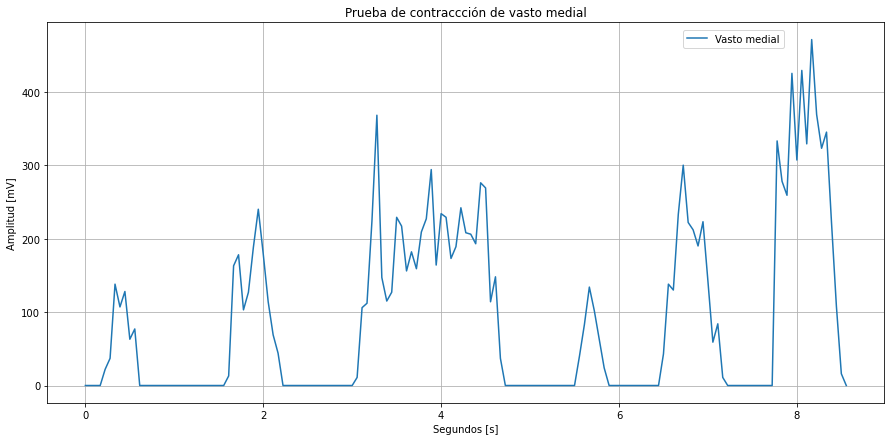

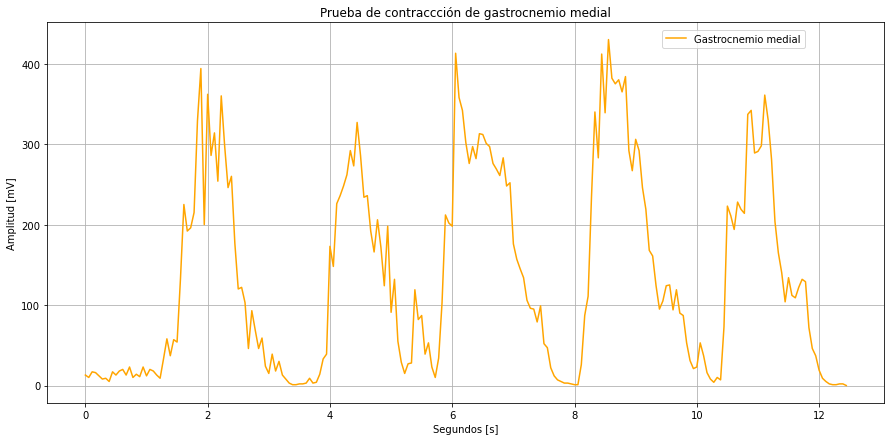

In [211]:
data, data_amount = project.get_data('Verificacion123.txt')
print("shape data: ", np.shape(data))
# 1740 datos en 95 segundos: 18.31 Hz promedio

# datacondolor = datacondolor[670:1700,:]
# project.plot_data(data[20:,:], data_amount)

cd_1 = data[80:235,:]
cd_2 = data[235:460,:]

vm_1, d = project.remove_offset(cd_1[:,3])
gc_1, d = project.remove_offset(cd_1[:,4])

sub_1 = vm_1 - gc_1

vm_2, d = project.remove_offset(cd_2[:,3])
gc_2, d = project.remove_offset(cd_2[:,4])

# theta_x_condolor = datacondolor[:,0]
# theta_y_condolor = datacondolor[:,1]
# theta_z_condolor = datacondolor[:,2]

fig, ax = plt.subplots(sharey=True)
fig.set_size_inches(15,7)
x1 = np.arange(vm_1.shape[0])
x2 = np.arange(vm_2.shape[0])
ax.plot(x1/18, vm_1, label="Vasto medial")
ax.set_ylabel("Amplitud [mV]")
ax.set_xlabel("Segundos [s]")
ax.set_title("Prueba de contraccción de vasto medial")
ax.grid(True)
ax.legend(loc="lower center", bbox_to_anchor=(0.82,0.92))
plt.show()
# ax[0].plot(x1, sub_1, label="Diferencia 1")
# ax[0].plot(x1, gc_1, label="Gastrocnemio 1")
# ax[1].plot(x2, vm_2, label="Vasto medial 2")
fig, ax = plt.subplots(sharey=True)
fig.set_size_inches(15,7)
ax.plot(x2/18, gc_2, color="orange", label="Gastrocnemio medial")
ax.set_title("Prueba de contraccción de gastrocnemio medial")
ax.set_ylabel("Amplitud [mV]")
ax.set_xlabel("Segundos [s]")
ax.grid(True)

ax.legend(loc="lower center", bbox_to_anchor=(0.82,0.92))

plt.show()

# Video del 24/11

shape data:  (1064, 5)


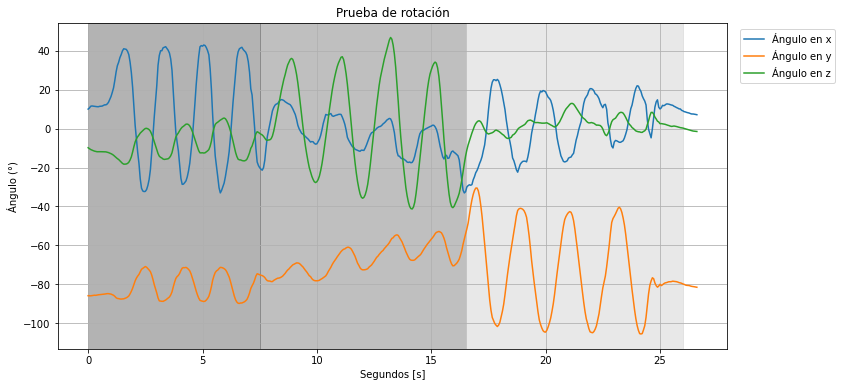

In [195]:
data, data_amount = project.get_data('Verificacion123.txt')
print("shape data: ", np.shape(data))
# 1740 datos en 95 segundos: 18.31 Hz promedio

# project.plot_data(data[490:,:3], 3)

cd = data[490:970,:3]
# cd_2 = data[235:460,:]

# vm_1, d = project.remove_offset(cd_1[:,3])
# gc_1, d = project.remove_offset(cd_1[:,4])

# sub_1 = vm_1 - gc_1

# vm_2, d = project.remove_offset(cd_2[:,3])
# gc_2, d = project.remove_offset(cd_2[:,4])

theta_x = cd[:,0]
theta_y = cd[:,1]
theta_z = cd[:,2]

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
x1 = np.arange(theta_x.shape[0])
ax.plot(x1/18, theta_x, label="Ángulo en x")
ax.plot(x1/18, theta_y, label="Ángulo en y")
ax.plot(x1/18, theta_z, label="Ángulo en z")
ax.set_ylabel("Ángulo (°)")
ax.set_xlabel("Segundos [s]")
ax.set_title("Prueba de rotación")
ax.grid(True)
# ax[0].plot(x1, sub_1, label="Diferencia 1")
# ax[0].plot(x1, gc_1, label="Gastrocnemio 1")

ax.legend(loc="lower center", bbox_to_anchor=(1.09,0.8))

ax.axvspan(0, 7.5, color='dimgray', alpha=0.5)
ax.axvspan(7.5, 16.5, color='grey', alpha=0.5)
ax.axvspan(16.5, 26, color='lightgray', alpha=0.5)
plt.show()

# Video prueba 24/11

shape data:  (1064, 5)


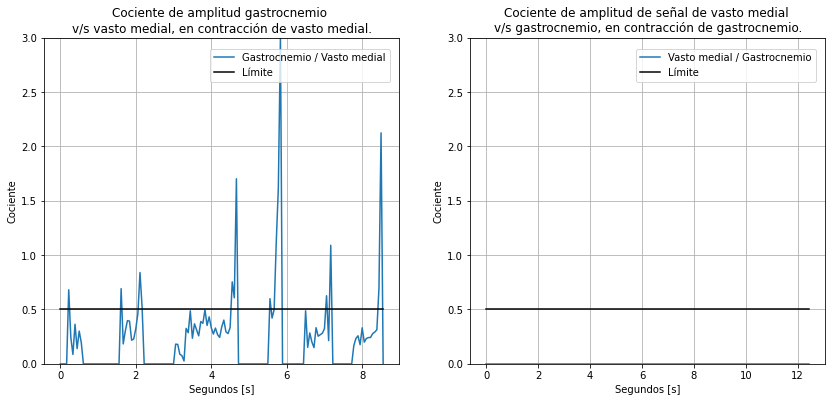

In [212]:
data, data_amount = project.get_data('Verificacion123.txt')
print("shape data: ", np.shape(data))
# 1740 datos en 95 segundos: 18.31 Hz promedio

# datacondolor = datacondolor[670:1700,:]
# project.plot_data(data[20:,:], data_amount)

cd_1 = data[80:235,:]
cd_2 = data[235:460,:]

vm_1, d = project.remove_offset(cd_1[:,3])
gc_1, d = project.remove_offset(cd_1[:,4])


vm_1_mask = vm_1>10
gc_1_masked = np.zeros(gc_1.shape)
quotients_1 = np.zeros(gc_1.shape)
for i in range(gc_1.shape[0]):
    if vm_1_mask[i]:
        gc_1_masked[i] = gc_1[i]
        quotients_1[i] = gc_1_masked[i]/vm_1[i]

sub_1 = vm_1 - gc_1

vm_2, d = project.remove_offset(cd_2[:,3])
gc_2, d = project.remove_offset(cd_2[:,4])

vm_2_mask = vm_2>10
gc_2_masked = np.zeros(gc_2.shape)
quotients_2 = np.zeros(gc_2.shape)
for i in range(gc_2.shape[0]):
    if vm_2_mask[i]:
        gc_2_masked[i] = gc_2[i]
        quotients_2[i] = gc_2_masked[i]/vm_2[i]


# theta_x_condolor = datacondolor[:,0]
# theta_y_condolor = datacondolor[:,1]
# theta_z_condolor = datacondolor[:,2]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x1 = np.arange(vm_1.shape[0])/18
x2 = np.arange(vm_2.shape[0])/18
# ax[0].plot(x1, vm_1, label="Vasto medial")
ax[0].set_ylabel("Cociente")
ax[0].set_xlabel("Segundos [s]")
ax[0].set_title("Cociente de amplitud gastrocnemio \nv/s vasto medial, en contracción de vasto medial.")
ax[0].grid(True)
ax[0].plot(x1, quotients_1-0.001, label="Gastrocnemio / Vasto medial")
ax[0].plot(x1, 0.5*np.ones(np.shape(x1)), color="black", label="Límite")
ax[0].set_ylim(0, 3)



ax[1].plot(x2, quotients_2-0.001, label="Vasto medial / Gastrocnemio")
ax[1].plot(x2, 0.5*np.ones(np.shape(x2)), color="black", label="Límite")
ax[1].set_ylim(0, 3)
ax[1].set_title("Cociente de amplitud de señal de vasto medial \nv/s gastrocnemio, en contracción de gastrocnemio.")
ax[1].set_ylabel("Cociente")
ax[1].set_xlabel("Segundos [s]")
ax[1].grid(True)

ax[0].legend(loc="lower center", bbox_to_anchor=(0.72,0.85))
ax[1].legend(loc="lower center", bbox_to_anchor=(0.72,0.85))

plt.show()

# Video del 24/11

# Lever test
# Caminata
# Extensión

shape data:  (789, 5)


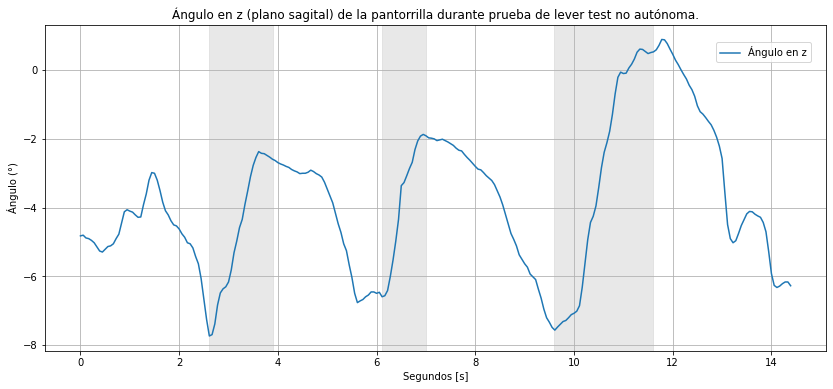

In [203]:
data, data_amount = project.get_data('levertestasistido.txt')
print("shape data: ", np.shape(data))
# 1740 datos en 95 segundos: 18.31 Hz promedio

# project.plot_data(data, data_amount)
# project.plot_data(data[50:310,2], 1)

cd = data[50:310,2]
# # cd_2 = data[235:460,:]

# # vm_1, d = project.remove_offset(cd_1[:,3])
# # gc_1, d = project.remove_offset(cd_1[:,4])

# # sub_1 = vm_1 - gc_1

# # vm_2, d = project.remove_offset(cd_2[:,3])
# # gc_2, d = project.remove_offset(cd_2[:,4])

# theta_x = cd[:,0]
# theta_y = cd[:,1]
# theta_z = cd[:,2]

fig, ax = plt.subplots()
fig.set_size_inches(14,6)
x1 = np.arange(cd.shape[0])
ax.plot(x1/18, cd, label="Ángulo en z")
ax.set_ylabel("Ángulo (°)")
ax.set_xlabel("Segundos [s]")
ax.set_title("Ángulo en z (plano sagital) de la pantorrilla durante prueba de lever test no autónoma.")
ax.grid(True)
# ax[0].plot(x1, sub_1, label="Diferencia 1")
# ax[0].plot(x1, gc_1, label="Gastrocnemio 1")

ax.legend(loc="lower center", bbox_to_anchor=(0.92,0.87))
ax.axvspan(2.6, 3.9, color='lightgray', alpha=0.5)
ax.axvspan(6.1, 7, color='lightgray', alpha=0.5)
ax.axvspan(9.6, 11.6, color='lightgray', alpha=0.5)
plt.show()

In [121]:
# Get angle and EMG data for analysis
# 0 theta_x, 1 theta_y, 2 theta_z, 3 EMG1, 4 EMG2

datacondolor, data_amount_condolor = project.get_data('ValidacionCaminataConDolor.txt')
print("shape datacondolor: ", np.shape(datacondolor))
# 1740 datos en 95 segundos: 18.31 Hz promedio

datacondolor = datacondolor[670:1700,:]
# project.plot_data(datacondolor, data_amount_condolor)

cd_1 = datacondolor[50:335,:]
cd_2 = datacondolor[360:610,:]
cd_3 = datacondolor[650:905,:]

theta_x_condolor = datacondolor[:,0]
theta_y_condolor = datacondolor[:,1]
theta_z_condolor = datacondolor[:,2]

emg_vm_condolor, delta1 = project.remove_offset(datacondolor[:,3])
emg_gc_condolor, delta2 = project.remove_offset(datacondolor[:,4])

# project.plot_data(theta_x_condolor, 1)
# project.plot_data(theta_y_condolor, 1)
# project.plot_data(theta_z_condolor, 1)
# project.plot_data(emg_vm_condolor, 1)
# project.plot_data(emg_gc_condolor, 1)

datasindolor, data_amount_sindolor = project.get_data('ValidacionCaminataLarga.txt')
print("shape datasindolor: ", np.shape(datasindolor))
# 2080 datos en 116 segundos: 17.93 Hz promedio

datasindolor = datasindolor[1150:2000,:]

sd_1 = datasindolor[25:210,:]
sd_2 = datasindolor[260:460,:]
sd_3 = datasindolor[490:680,:]

# project.plot_data(sd_1, data_amount_condolor) # 0 theta_x, 1 theta_y, 2 theta_z, 3 EMG1, 4 EMG2
# project.plot_data(sd_2, data_amount_condolor)
# project.plot_data(sd_3, data_amount_condolor)


# project.plot_data(datasindolor, data_amount_sindolor)

theta_x_sindolor = datasindolor[:,0]
theta_y_sindolor = datasindolor[:,1]
theta_z_sindolor = datasindolor[:,2]

emg_vm_sindolor, delta3 = project.remove_offset(datasindolor[:,3])
emg_gc_sindolor, delta4 = project.remove_offset(datasindolor[:,4])

# project.plot_data(theta_x_sindolor, 1)
# project.plot_data(theta_y_sindolor, 1)
# project.plot_data(theta_z_sindolor, 1)
# project.plot_data(emg_vm_sindolor, 1)
# project.plot_data(emg_gc_sindolor, 1)

# freq, y = project.generate_fft_and_plot(datacd)
# t, filtered_data = project.low_pass(freq, y)
# data_rms = project.rms(emg_data)
# filtered_data_rms = project.rms(filtered_data)
# project.eda_process(data[:,4], sampling_rate=37)

shape datacondolor:  (1740, 5)
shape datasindolor:  (2080, 5)


Umbral de activación (normalizada) escogido: 0.1

Caminata 1 ----------------------------------------
Promedio de actividad (normalizada) de gastrocnemio en contracción:  0.19782608695652174
Promedio de actividad (normalizada) de gastrocnemio en reposo:  0.002972242692213216
Porcentaje de aumento: 6655.785123966941%

Promedio de actividad (normalizada) de vasto medial en contracción:  0.11302878965922444
Promedio de actividad (normalizada) de vasto medial en reposo:  0.0
Porcentaje de aumento infinito, ya que la actividad de vasto medial en reposo es 0.

Caminata 2 ----------------------------------------
Promedio de actividad (normalizada) de gastrocnemio en contracción:  0.23837429111531194
Promedio de actividad (normalizada) de gastrocnemio en reposo:  0.005453205600589536
Porcentaje de aumento: 4371.26909518214%

Promedio de actividad (normalizada) de vasto medial en contracción:  0.11718049707999456
Promedio de actividad (normalizada) de vasto medial en reposo:  0.0
Porcentaje de 

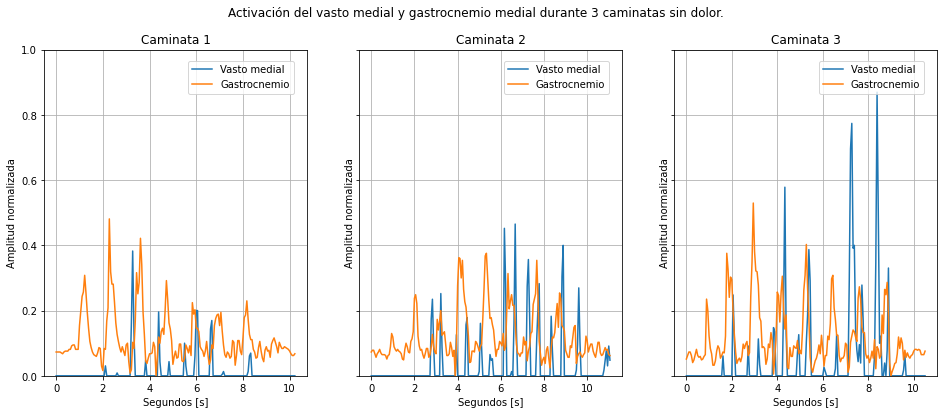

In [207]:
data_to_show = (sd_1, sd_2, sd_3)




freq_sample = 18

fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(16,6)
for i in range(len(data_to_show)):
    emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
    emg_vm_current = emg_vm_current/230

    emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])
    emg_gc_current = emg_gc_current/370

    vm_mask = emg_vm_current>0.1
    gc_mask = emg_gc_current>0

    prom_vm_in = np.mean(emg_vm_current[vm_mask])
    prom_vm_out = np.mean(emg_vm_current[np.invert(vm_mask)])

    if i == 0:
        print("Umbral de activación (normalizada) escogido: 0.1")
    print(f"\nCaminata {i+1} ----------------------------------------")
    print("Promedio de actividad (normalizada) de gastrocnemio en contracción: ", prom_vm_in)
    print("Promedio de actividad (normalizada) de gastrocnemio en reposo: ", prom_vm_out)
    print(f"Porcentaje de aumento: {prom_vm_in/prom_vm_out*100}%\n")

    prom_gc_in = np.mean(emg_gc_current[gc_mask])
    prom_gc_out = np.mean(emg_gc_current[np.invert(gc_mask)])

    print("Promedio de actividad (normalizada) de vasto medial en contracción: ", prom_gc_in)
    print("Promedio de actividad (normalizada) de vasto medial en reposo: ", prom_gc_out)
    
    if prom_gc_out == 0:
        print("Porcentaje de aumento infinito, ya que la actividad de vasto medial en reposo es 0.")  

    x = np.arange(np.shape(emg_vm_current)[0])/freq_sample

    ax[i].plot(x, emg_vm_current, label="Vasto medial")
    ax[i].plot(x, emg_gc_current, label="Gastrocnemio")
    
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Amplitud normalizada")
    ax[i].set_ylim(0,1)
    ax[i].set_title(f"Caminata {i+1}")
    ax[i].tick_params("y") 
    ax[i].grid(True)

    
    # ax[i].plot(x, prom_vm_in, color="royalblue", label="Promedio de vasto medial activado")
    # ax[i].plot(x, prom_vm_out, color="navy", label="Promedio de vasto medial no activado")

    # ax[i].plot(x, prom_gc_in, color="orange", label="Promedio de gastrocnemio activado")
    # ax[i].plot(x, prom_gc_out, color="tan", label="Promedio de gastrocnemio no activado")
    ax[i].set_xlabel("Segundos [s]")
    ax[i].set_ylabel("Amplitud normalizada")
    ax[i].legend(loc="lower center", bbox_to_anchor=(0.75,0.85))
fig.suptitle("Activación del vasto medial y gastrocnemio medial durante 3 caminatas sin dolor.")
plt.show()


In [164]:
# data_to_show = (cd_1, cd_2, cd_3)

# freq_sample = 18

# fig, ax = plt.subplots(1,3, sharey=True)
# fig.set_size_inches(25,10)
# for i in range(len(data_to_show)):
#     emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
#     emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

#     x = np.arange(np.shape(emg_vm_current)[0])/freq_sample

#     ax[i].plot(x, emg_vm_current/150, label="Vasto medial")
#     ax[i].plot(x, emg_gc_current/370, label="Gastrocnemio")
#     ax[i].set_xlabel("Segundos [s]")
#     ax[i].set_ylabel("Amplitud normalizada")
#     ax[i].set_ylim(0,1)
#     ax[i].set_title(f"Caminata {i+1}")
#     ax[i].tick_params("y")
#     ax[i].legend(loc="lower center", bbox_to_anchor=(0.84,0.92))
#     ax[i].grid(True)

# fig.suptitle("Activación del vasto medial y gastrocnemio medial durante 3 caminatas con dolor.")
# plt.show()



# fig, ax = plt.subplots(1,3, sharey=True)
# fig.set_size_inches(25,10)
# for i in range(len(data_to_show)):
#     emg_vm_current, d = project.remove_offset(data_to_show[i][:,3])
#     emg_gc_current, d = project.remove_offset(data_to_show[i][:,4])

#     correlation = np.correlate(emg_vm_current, emg_gc_current, 'full')
#     # print(np.shape(emg_vm_current))
#     var_vm = np.var(emg_vm_current)
#     var_gc = np.var(emg_gc_current)
#     # print(var_vm)

#     x = np.arange(np.shape(correlation)[0])

#     ax[i].plot(x, correlation/np.sqrt(var_vm*var_gc), label="Correlación cruzada")
#     ax[i].set_xlabel("Segundos [s]")
#     ax[i].set_ylabel("Correlación cruzada")
#     # ax[i].set_ylim(0,1)
#     ax[i].set_title(f"Caminata {i+1}")
#     ax[i].tick_params("y")
#     ax[i].legend(loc="lower center", bbox_to_anchor=(0.82,0.92))
#     ax[i].grid(True)

# fig.suptitle("Correlación cruzada entre las activaciones del vasto medial y gastrocnemio durante una caminata con dolor.")
# plt.show()

shape data:  (708, 5)
[[14, 34], [81, 97], [136, 156], [205, 230], [281, 298]]


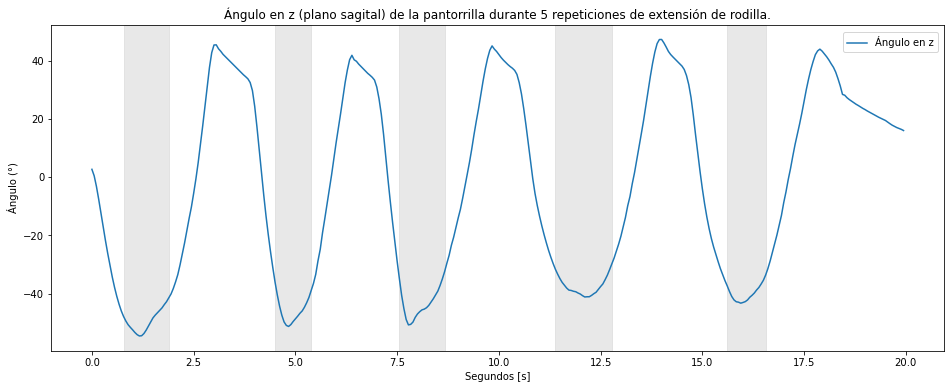

In [209]:
data, data_amount = project.get_data('extension_validacion.txt')
print("shape data: ", np.shape(data))
# 1740 datos en 95 segundos: 18.31 Hz promedio

data = data[50:410,:4]

# project.plot_data(data, 4)

theta_z = data[:,2]
gc = data[:,3]

gc_mask = gc>20

intervals = []
lower = 0
upper = 0

for i in range(gc_mask.shape[0]-1):    
    if gc_mask[i] == 0 and gc_mask[i+1] == 1:
        lower = i

    if lower != 0 and gc_mask[i] == 1 and gc_mask[i+1] == 0:
        upper = i
        intervals.append([lower,upper])
        lower = 0
        upper = 0

print(intervals)

fig, ax = plt.subplots()
fig.set_size_inches(16,6)
ax.plot(np.arange(theta_z.shape[0])/18, theta_z, label="Ángulo en z")
for interval in intervals:
    lower = interval[0]/18
    upper = interval[1]/18
    ax.axvspan(lower,upper, color='lightgray', alpha=0.5)

ax.set_xlabel("Segundos [s]")
ax.set_ylabel("Ángulo (°)")
ax.set_title("Ángulo en z (plano sagital) de la pantorrilla durante 5 repeticiones de extensión de rodilla.")
ax.legend(loc="lower center", bbox_to_anchor=(0.94,0.9))
plt.show()

# Cada región gris es de actividad muscular no nula del vasto medial. 